1. Data Preparation
- Load the dataset from a CSV or generate 500–1000 random rows using numpy (e.g., random wallets, tokens, amounts).

- Parse the timestamp column as datetime using pd.to_datetime.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset from a CSV

df = pd.read_csv('web3_token_transfers.csv')

df.head()

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60


In [3]:
# Parse the timestamp column as datetime using pd.to_datetime

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['timestamp'].head(2)

0   2024-07-27 03:58:20
1   2024-07-14 03:04:09
Name: timestamp, dtype: datetime64[ns]

2. Basic Exploration (Pandas)
- Show the top 5 and bottom 5 rows.
- Count the number of unique wallets (senders and receivers).
- Count how many transactions each token has.


In [4]:
# Show the top 5 

df.head(5)

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60


In [5]:
# show the bottom 5 rows.

df.tail(5)

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
995,0x7d321f54337d3b2fe762d2f98cc65a08b33c8167,0x12b225c93d09fbfee50834d34bb976ba2ab744a4,USDC,48.03,2024-07-19 20:23:42,30503,1.63
996,0x99ffd9b436b447f0b75704c666c2e3387468aabc,0xad14eea793cb71aeec4914db1cd51b955768446a,USDC,1246.35,2024-07-06 01:06:21,81703,3.24
997,0xf2476d3a88703c2484581466c841db8ce62c411d,0x8233219c96b703195211f975be60343e130b66a5,WBTC,73.57,2024-07-29 12:05:32,85379,4.28
998,0xb7e4e6b50e93960442a38761471840f4a48cb869,0x199d63a67615ec83d45f91010f6c8206f711b2be,WBTC,1500.25,2024-07-27 03:40:11,78866,9.24
999,0xb21913e7f083654695aeeab90f1510468f1dc41e,0x9bca5940e7d53f22ca22245954f66ece9ab16af8,USDC,295.30,2024-07-21 23:44:32,37905,9.94


In [6]:
# Count the number of unique wallets (senders and receivers).

unique_senders = df['sender_wallet'].nunique()
unique_receivers = df['receiver_wallet'].nunique()

print("Number of unique sender wallets:", unique_senders)
print("Number of unique receiver wallets:", unique_receivers)


Number of unique sender wallets: 1000
Number of unique receiver wallets: 1000


In [7]:
# Count how many transactions each token has.

transactions_per_token = df['token'].value_counts()

print("Number of transactions per token:", transactions_per_token)


Number of transactions per token: token
WBTC    214
ETH     203
USDC    200
UNI     194
DAI     189
Name: count, dtype: int64


3. Wallet Analysis
- Compute total amount sent and received by each wallet.
- Identify the top 5 wallets by total amount sent (group + sum + sort).
- Create a new column: net_flow = received - sent.

In [9]:
# Compute total amount sent and received by each wallet.

total_sent = df.groupby('sender_wallet')['amount'].sum().reset_index()
total_received = df.groupby('receiver_wallet')['amount'].sum().reset_index()

# Merge total_sent and total_received into a single summary DataFrame

# Rename columns for merging
total_sent_renamed = total_sent.rename(columns={'sender_wallet': 'wallet', 'amount': 'total_sent'})
total_received_renamed = total_received.rename(columns={'receiver_wallet': 'wallet', 'amount': 'total_received'})

# Merge on 'wallet'
total_summary = pd.merge(total_sent_renamed, total_received_renamed, on='wallet', how='outer').fillna(0)

total_summary.head()

,wallet,total_sent,total_received
0,0x0003c3872d1848ec2011e26ad7571c69370f9fd0,634.78,0.0
1,0x0034126c0d51266516fd65d12f3c9a67f04062fa,138.44,0.0
2,0x005f673297464a3a9b8657e7f9d1a19e6d62f0f7,26.53,0.0
3,0x00906f78509cf901863c7f6980e32877871b784e,452.03,0.0
4,0x00fafa59c53d3dd96f5ce0c922ea899710e33c56,136.02,0.0


In [10]:
# Identify the top 5 wallets by total amount sent (group + sum + sort).

total_sent_renamed.sort_values(by='total_sent', ascending=False).head(5)

,wallet,total_sent
829,0xd538f9c05ec121d00f70a00aa58b4ea2b7339a54,4086.22
33,0x0a83fcafb15e96514ef61020d4c96714a42bd923,2884.04
792,0xcc3f561f13db4c0a50c9f71ef693cf59eef2ba25,2847.44
60,0x1172060a8e20eb50ab9194d2780e99a42c9ac008,2478.41
368,0x64182502c1b1b4d6584998fc33358956434d2dc4,2328.50


In [11]:
# Create a new column: net_flow = received - sent.

total_summary['net_flow'] = total_summary['total_received'] - total_summary['total_sent']

total_summary.head()

,wallet,total_sent,total_received,net_flow
0,0x0003c3872d1848ec2011e26ad7571c69370f9fd0,634.78,0.0,-634.78
1,0x0034126c0d51266516fd65d12f3c9a67f04062fa,138.44,0.0,-138.44
2,0x005f673297464a3a9b8657e7f9d1a19e6d62f0f7,26.53,0.0,-26.53
3,0x00906f78509cf901863c7f6980e32877871b784e,452.03,0.0,-452.03
4,0x00fafa59c53d3dd96f5ce0c922ea899710e33c56,136.02,0.0,-136.02


4. Token Analysis
- Find the average, median, and standard deviation of amount per token (use .agg()).
- Identify the token with the highest transaction volume (in total amount, not count).
- Plot a bar chart showing total amount transferred per token using matplotlib.

In [12]:
# Find the average, median, and standard deviation of amount per token (use .agg()).

token_stats = df.groupby('token')['amount'].agg(['mean', 'median', 'std']).reset_index()

token_stats.head()

,token,mean,median,std
0,DAI,454.243386,316.210,456.309472
1,ETH,505.486502,365.730,524.465758
2,UNI,478.323196,305.365,497.945907
3,USDC,518.157150,367.185,507.707334
4,WBTC,473.650093,349.240,443.158188


In [13]:
# Identify the token with the highest transaction volume (in total amount, not count).

highest_volume_token = df.groupby('token')['amount'].sum().idxmax()
highest_volume_amount = df.groupby('token')['amount'].sum().max()

print("Token with highest transaction volume:", highest_volume_token)
print("Total amount for this token:", highest_volume_amount)

Token with highest transaction volume: USDC
Total amount for this token: 103631.43


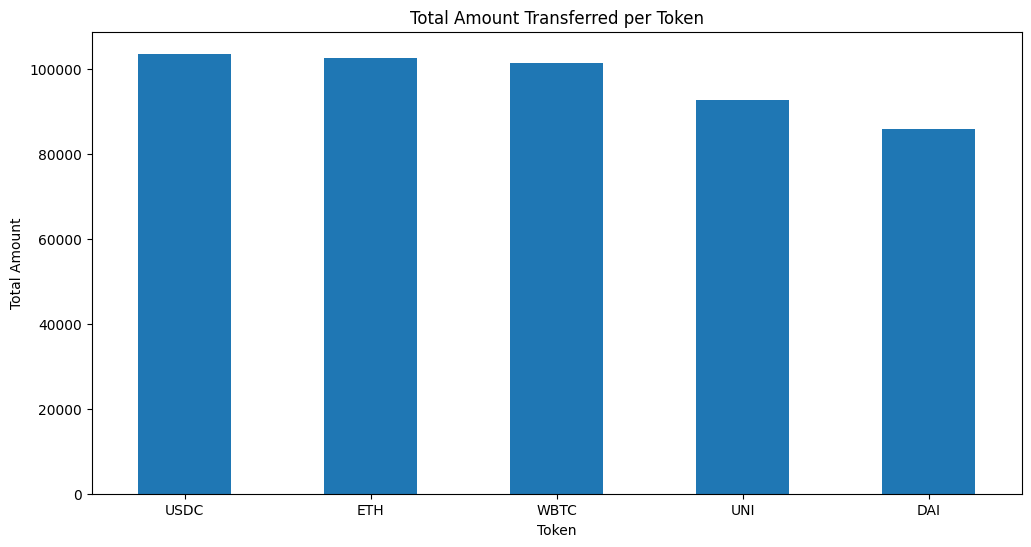

In [14]:
# Plot a bar chart showing total amount transferred per token using matplotlib.

import matplotlib.pyplot as plt

total_amount_per_token = df.groupby('token')['amount'].sum().sort_values(ascending=False)
total_amount_per_token.plot(kind='bar', figsize=(12, 6))
plt.title('Total Amount Transferred per Token')
plt.xlabel('Token')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)
plt.show()

5. Time-based Analysis
- Group data by day (timestamp.dt.date) and compute:
- Number of transactions per day
- Total volume per day
- Average transaction size per day


In [15]:
daily = df.groupby(df['timestamp'].dt.date)['amount'].agg(
    num_transactions='count',
    total_volume='sum',
    avg_transaction_size='mean'
).reset_index()

# Rename the date column for clarity
daily.rename(columns={'timestamp': 'date'}, inplace=True)

daily.head()

,date,num_transactions,total_volume,avg_transaction_size
0,2024-07-01,28,11886.22,424.507857
1,2024-07-02,33,16560.16,501.823030
2,2024-07-03,23,8569.60,372.591304
3,2024-07-04,32,18195.10,568.596875
4,2024-07-05,34,13713.53,403.339118


6. Gas & Fee Analysis (NumPy + Pandas)  
Use numpy to:
- Compute total gas used per token
- Calculate the average fee in USD using NumPy’s np.mean()
- Identify the top 3 most expensive transactions (based on tx_fee_usd).

In [16]:
# Compute total gas used per token
total_gas = df.groupby('token', as_index=False)['gas_used'].sum()
total_gas = total_gas.rename(columns={'gas_used': 'total_gas_used'})
total_gas = total_gas.sort_values(by='total_gas_used', ascending=False)
total_gas.head()

,token,total_gas_used
4,WBTC,12930658
1,ETH,12163737
2,UNI,12054799
3,USDC,11967216
0,DAI,11918034


In [17]:
# Calculate the average fee in USD using NumPy’s np.mean()

Average_fee = np.mean(df['tx_fee_usd'])
print("Average transaction fee in USD:", Average_fee)

Average transaction fee in USD: 5.24938


In [18]:
# Identify the top 3 most expensive transactions (based on tx_fee_usd).

df.head(3)

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63


In [19]:
# Identify the top 3 most expensive transactions (based on tx_fee_usd).
top_3_expensive_txns = df.nlargest(3, 'tx_fee_usd')
print("Top 3 most expensive transactions: ")
top_3_expensive_txns

Top 3 most expensive transactions: 


,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
117,0xb40ff3ae9391ca7df67ba9877a5b1ad2d2e15c5a,0xa10e3155d329183ef464cbc77795c9f3d48d26db,DAI,103.25,2024-07-27 19:37:55,61042,9.98
692,0xde9626a617067e8c9d9f5e53cf631139b4696d56,0x2d9e724bee9d687f456fcdd2a76132a7d58ada94,ETH,354.24,2024-07-21 08:41:07,25358,9.98
75,0x44cb7ef9bc0528b331a9c8cbdd555eeda37cf0e4,0x53777175d6fb4679ca72b7d2486e5cefce3cdc56,UNI,652.83,2024-07-26 14:37:35,94972,9.97


7. Advanced Challenges
- Create a pivot table: Rows = Token, Columns = Day, Values = Total amount transferred
- Use apply() to tag transactions as:
- low if amount < 100
- medium if 100 <= amount <= 1000
-high if amount > 1000
- Use np.where() to create a binary feature: is_large_tx (1 if amount > 1000, else 0)

In [20]:
# Create a pivot table: Rows = Token, Columns = Day, Values = Total amount transferred

pivot_table = df.pivot_table(
    index='token',
    columns=df['timestamp'].dt.date,
    values='amount',
    aggfunc='sum',
    fill_value=0
)

pivot_table.head()

timestamp,2024-07-01,2024-07-02,2024-07-03,2024-07-04,2024-07-05,2024-07-06,2024-07-07,2024-07-08,2024-07-09,2024-07-10,...,2024-07-21,2024-07-22,2024-07-23,2024-07-24,2024-07-25,2024-07-26,2024-07-27,2024-07-28,2024-07-29,2024-07-30
token,,,,,,,,,,,,,,,,,,,,,
DAI,981.03,3293.77,1098.44,1429.71,2150.39,4961.15,1459.46,2778.56,5690.08,2873.41,...,4683.88,5082.96,1274.72,5799.61,2187.39,2362.51,3811.85,5424.34,2521.41,3661.26
ETH,4437.94,3387.59,2179.93,2631.23,2163.15,1396.71,5213.51,7382.79,1054.12,4103.09,...,1324.07,2011.65,1013.46,4403.55,3904.14,1632.84,2521.84,4941.49,1868.99,3092.18
UNI,1365.56,3226.33,1139.66,4812.17,3343.93,2662.74,2526.87,4525.55,2530.37,240.37,...,1186.67,4703.19,2651.29,3757.96,4080.85,4372.96,4908.37,4156.40,2501.23,4340.96
USDC,3315.54,4156.94,2153.10,5980.24,4019.92,3759.70,4501.74,1489.73,2647.31,3573.40,...,5045.03,3625.93,5466.10,3349.96,2314.46,1959.97,4458.44,3199.36,978.38,2464.37
WBTC,1786.15,2495.53,1998.47,3341.75,2036.14,3661.97,3547.89,4055.82,3585.88,935.94,...,7192.64,6496.35,6356.13,4042.02,4023.45,712.79,3548.41,5095.99,6346.91,5295.82


In [21]:
# Use apply() to tag transactions as: low if amount < 100

df['txn_tag'] = df['amount'].apply(
    lambda x: 'low' if x < 100 else 'medium' if 100 <= x <= 1000 else 'high'
)

df[['amount', 'txn_tag']].head()

,amount,txn_tag
0,234.63,medium
1,1505.06,high
2,658.37,medium
3,456.47,medium
4,84.81,low


In [22]:
# Use np.where() to create a binary feature: is_large_tx (1 if amount > 1000, else 0)

df['is_large_tx'] = np.where(df['amount'] > 1000, 1, 0)
df[['amount', 'txn_tag', 'is_large_tx']].head()

,amount,txn_tag,is_large_tx
0,234.63,medium,0
1,1505.06,high,1
2,658.37,medium,0
3,456.47,medium,0
4,84.81,low,0


### Bonus (Optional)
- Merge two datasets: one for transfers and one for token prices (mock or real)
- Add a column for amount_usd = amount * token_price
- Recalculate top tokens by USD volume


In [23]:
df.columns

Index(['sender_wallet', 'receiver_wallet', 'token', 'amount', 'timestamp',
       'gas_used', 'tx_fee_usd', 'txn_tag', 'is_large_tx'],
      dtype='object')

In [24]:
# Merge two datasets: one for transfers and one for token prices (mock or real)

# Mock DataFrame

transfers = pd.DataFrame({
    'Token': ['DAI', 'ETH', 'UNI', 'USDC', 'wBTC', 'SOL'],
    'Amount': [50, 1200, 700, 50, 2000, 300]
})

token_prices = pd.DataFrame({
    'Token': ['DAI', 'ETH', 'UNI', 'USDC', 'wBTC', 'SOL'],
    'token_price': [1.00, 3200.00, 6.50, 1.00, 60000.00, 80.00]
})

In [25]:
df_merged = pd.merge(transfers, token_prices, on='Token')

In [27]:
# Merge transfers with prices
df_merged = pd.merge(transfers, token_prices, on='Token')
df_merged.head()

,Token,Amount,token_price
0,DAI,50,1.0
1,ETH,1200,3200.0
2,UNI,700,6.5
3,USDC,50,1.0
4,wBTC,2000,60000.0


In [28]:
# Add a column for amount_usd = amount * token_price

df_merged['amount_usd'] = df_merged['Amount'] * df_merged['token_price']

df_merged.head(3)

,Token,Amount,token_price,amount_usd
0,DAI,50,1.0,50.0
1,ETH,1200,3200.0,3840000.0
2,UNI,700,6.5,4550.0


In [29]:
# Recalculate top tokens by USD volume

top_tokens_usd = (
    df_merged.groupby('Token')['amount_usd']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

top_tokens_usd

,Token,amount_usd
0,wBTC,120000000.0
1,ETH,3840000.0
2,SOL,24000.0
3,UNI,4550.0
4,DAI,50.0
5,USDC,50.0
